## Load Libraries

In [1]:
library("rcompanion")
library("car")
library("effects")
library("multcomp")

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




## Load in Data

In [2]:
cellPhone <- read.csv("/Users/kenyashiafernandez/Downloads/cellPhone.csv")

## Testing Assumptions

### Normality

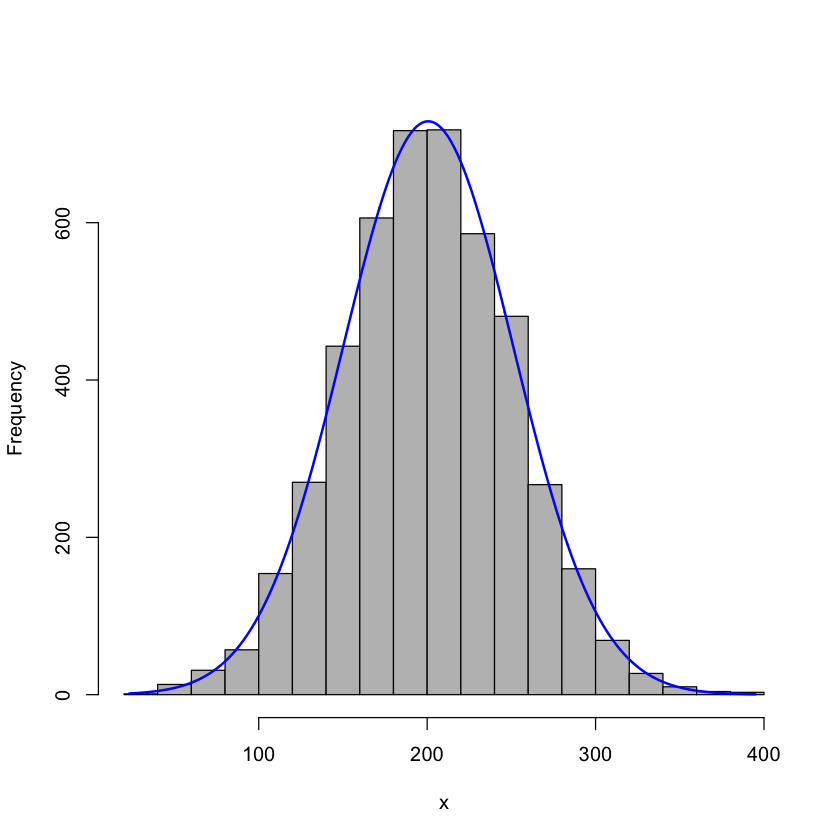

In [3]:
plotNormalHistogram(cellPhone$Night.Mins)

## Homogeneity of Varience

In [4]:
leveneTest(Night.Mins~International.Plan, data=cellPhone)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.8645784,0.3525092
,4615,NA,NA


## Homogeneity of Regression Slopes

In [5]:
Homogeneity_RegrSlp = lm(Night.Mins~vMail.Plan, data=cellPhone)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
vMail.Plan,1,4.877302e+02,487.7302,0.1908846,0.6622018
Residuals,4615,1.179181e+07,2555.1049,NA,NA


## Analysis

In [7]:
ANCOVA = lm(Night.Mins~vMail.Plan + International.Plan*vMail.Plan, data=cellPhone)
anova(ANCOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
vMail.Plan,1,4.877302e+02,487.7302,0.1909381,0.66215744
International.Plan,1,7.978627e+03,7978.6270,3.1234975,0.07723709
vMail.Plan:International.Plan,1,4.349520e+02,434.9520,0.1702763,0.67988552
Residuals,4613,1.178340e+07,2554.3888,NA,NA


### Whether a client has an international plan or not does not influence the number of night minutes he or she uses, even holding whether they have a voice mail plan constant.